# Data Preparation and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import torch

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

from datetime import datetime

from torch import nn

## Preparation Survey Results Public Dataset

In [2]:
df = pd.read_csv('dataset/survey_results_public.csv')
df

,Unnamed: 0,Country,EdLevel,YearsCodePro,Employment,Salary
0,2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
1,3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
2,8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
3,10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
4,11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0
...,...,...,...,...,...,...
37914,73116,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",16,"Employed, full-time",115000.0
37915,73118,Nigeria,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",57720.0
37916,73119,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1,"Employed, full-time",70000.0
37917,73120,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",35192.0


In [3]:
# Drop kolom unamed
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
1,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
2,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
3,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37919 entries, 0 to 37918
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       37919 non-null  object 
 1   EdLevel       37919 non-null  object 
 2   YearsCodePro  37919 non-null  object 
 3   Employment    37919 non-null  object 
 4   Salary        37919 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.4+ MB


In [5]:
# Ambil atribut non-null pada salary
df = df[df['Salary'].notnull()]
df.shape

(37919, 5)

In [6]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

### Preparation Employment Column

In [7]:
df['Employment'].value_counts()

Employed, full-time                                                                             31382
Independent contractor, freelancer, or self-employed                                             2739
Employed, full-time;Independent contractor, freelancer, or self-employed                         2633
Employed, part-time                                                                               632
Independent contractor, freelancer, or self-employed;Employed, part-time                          207
Employed, full-time;Employed, part-time                                                           151
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      118
I prefer not to say                                                                                27
Retired                                                                                            18
Employed, part-time;Retired                                                       

In [8]:
df = df[df['Employment'] != 'I prefer not to say']
df = df[~df['Employment'].str.contains('retired', case=False)]

df['Employment'].value_counts()

Employed, full-time                                                                             31382
Independent contractor, freelancer, or self-employed                                             2739
Employed, full-time;Independent contractor, freelancer, or self-employed                         2633
Employed, part-time                                                                               632
Independent contractor, freelancer, or self-employed;Employed, part-time                          207
Employed, full-time;Employed, part-time                                                           151
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      118
Name: Employment, dtype: int64

In [9]:
# Pisahkan ke baris baru dipisahkan dengan koma pada kolom Employment
df['Employment'] = df['Employment'].str.split(', ')
# Pisahkan ke baris baru
df = df.explode('Employment')
df['Employment'].value_counts()

Employed                            34916
full-time                           31382
freelancer                           5697
or self-employed                     5372
Independent contractor               2946
full-time;Independent contractor     2751
part-time                            1108
or self-employed;Employed             325
full-time;Employed                    151
Name: Employment, dtype: int64

In [10]:
# Pisahkan ke baris baru dipisahkan dengan titik koma pada kolom Employment
df['Employment'] = df['Employment'].str.split(';')
# Pisahkan ke baris baru
df = df.explode('Employment')
df['Employment'].value_counts()

Employed                  35392
full-time                 34284
Independent contractor     5697
freelancer                 5697
or self-employed           5697
part-time                  1108
Name: Employment, dtype: int64

In [11]:
# Menghilangkan kata or pada nilai or self-employed
df['Employment'] = df['Employment'].str.replace('or ', '')
df['Employment'].value_counts()

Employed                  35392
full-time                 34284
Independent contractor     5697
freelancer                 5697
self-employed              5697
part-time                  1108
Name: Employment, dtype: int64

In [12]:
# Drop kolom dengan nilai employment = employed
df = df[df['Employment'] != 'Employed']
df = df[df['Employment'] != 'Independent contractor']
df = df[df['Employment'] != 'self-employed']
df['Employment'].value_counts()

full-time     34284
freelancer     5697
part-time      1108
Name: Employment, dtype: int64

### Preparation Country Column

In [13]:
df['Country'].value_counts()

United States of America                                9118
Germany                                                 3088
United Kingdom of Great Britain and Northern Ireland    2746
India                                                   2352
Canada                                                  1600
                                                        ... 
Fiji                                                       1
Palau                                                      1
Monaco                                                     1
Saint Lucia                                                1
Seychelles                                                 1
Name: Country, Length: 159, dtype: int64

In [14]:
# Melakukan filter pada kolom Country jika nilai kurang dari cutoff
def convert_to_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories.value_counts())):
        if categories.value_counts().iloc[i] > cutoff:
            categorical_map[categories.value_counts().index[i]] = categories.value_counts().index[i]
        else:
            categorical_map[categories.value_counts().index[i]] = 'Other'
    return categories.map(categorical_map)

In [15]:
df['Country'] = convert_to_categories(df['Country'], 800)
df['Country'].value_counts()

Other                                                   14388
United States of America                                 9118
Germany                                                  3088
United Kingdom of Great Britain and Northern Ireland     2746
India                                                    2352
Canada                                                   1600
France                                                   1454
Brazil                                                   1438
Poland                                                   1158
Spain                                                    1059
Netherlands                                               955
Australia                                                 877
Italy                                                     856
Name: Country, dtype: int64

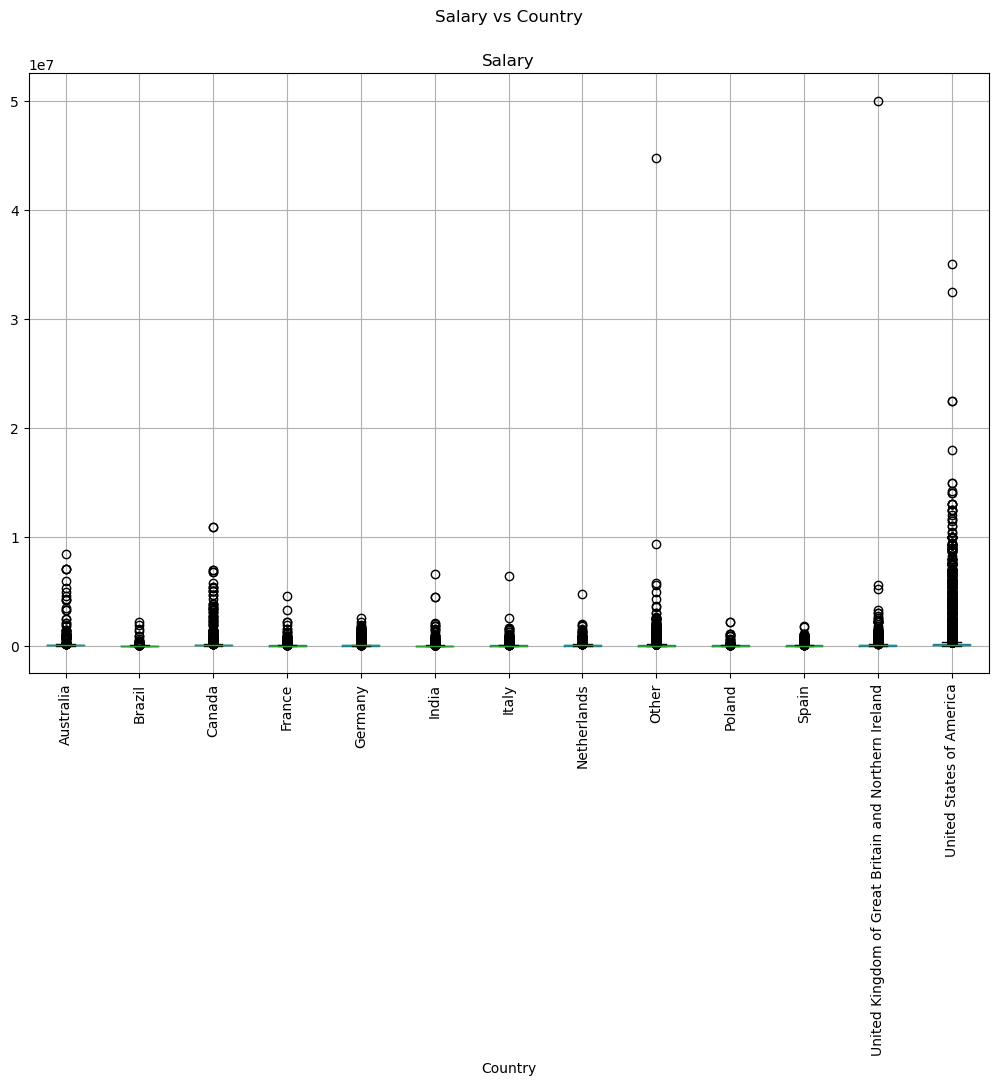

In [16]:
# Mengecek outliers
fig, ax = plt.subplots(figsize=(12, 8))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary vs Country')
plt.xticks(rotation=90)
plt.show()

In [17]:
df = df[df['Salary'] <= 300000]
df = df[df['Salary'] >= 1000]
df.shape

(38348, 5)

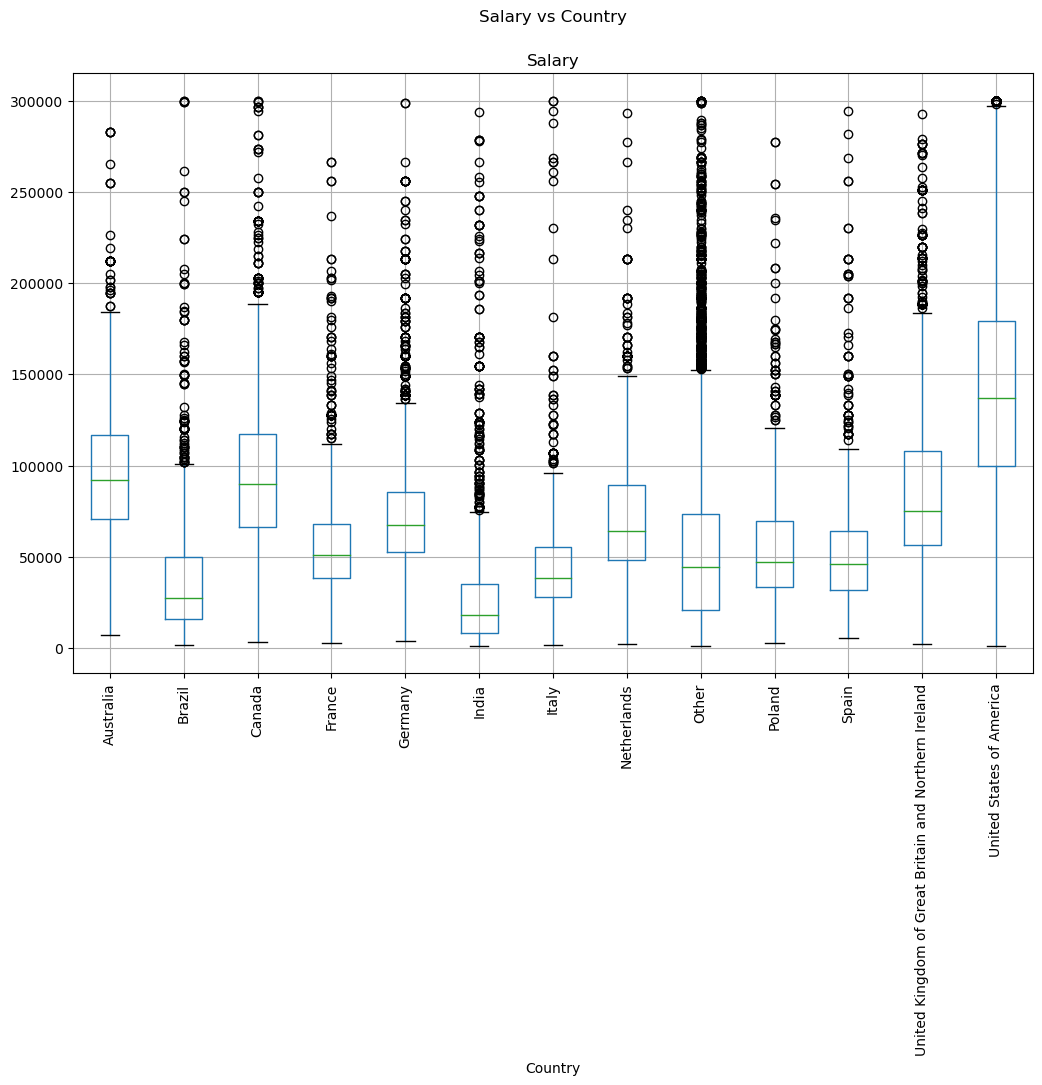

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary vs Country')
plt.xticks(rotation=90)
plt.show()

### Preparation YearsCodePro Column

In [19]:
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51}).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38348 entries, 0 to 37918
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38348 non-null  object 
 1   EdLevel       38348 non-null  object 
 2   YearsCodePro  38348 non-null  int32  
 3   Employment    38348 non-null  object 
 4   Salary        38348 non-null  float64
dtypes: float64(1), int32(1), object(3)
memory usage: 1.6+ MB


In [20]:
df['YearsCodePro'].unique()

array([ 5, 17,  6,  2, 10,  4, 22, 20,  9, 14, 21, 15,  3, 25,  7,  8, 12,
       19,  1, 24, 11, 23,  0, 18, 40, 37, 46, 13, 32, 31, 39, 27, 28, 16,
       30, 34, 35, 26, 42, 38, 36, 43, 41, 44, 29, 48, 33, 51, 45, 50, 47,
       49])

### Preparation EdLevel Column

In [21]:
df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          18127
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        9924
Some college/university study without earning a degree                                 4625
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     1806
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1331
Associate degree (A.A., A.S., etc.)                                                    1308
Professional degree (JD, MD, etc.)                                                      638
Something else                                                                          363
Primary/elementary school                                                               226
Name: EdLevel, dtype: int64

In [22]:
def education_converter(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor'
    elif 'Master’s degree' in x:
        return 'Master'
    elif 'Associate degree' in x:
        return 'Associate'
    elif 'Professional degree' in x:
        return 'Professional'
    elif 'Other doctoral degree' in x:
        return 'Doctoral'
    elif 'Secondary school' in x:
        return 'Secondary school'
    elif 'Primary' in x:
        return 'Primary school'
    else:
        return 'Other degree'
    
df['EdLevel'] = df['EdLevel'].apply(education_converter)
df['EdLevel'].value_counts()

Bachelor            18127
Master               9924
Other degree         4988
Secondary school     1806
Doctoral             1331
Associate            1308
Professional          638
Primary school        226
Name: EdLevel, dtype: int64

### Summary

In [23]:
df['Country'].value_counts()

Other                                                   13752
United States of America                                 8125
Germany                                                  2921
United Kingdom of Great Britain and Northern Ireland     2424
India                                                    2257
Canada                                                   1487
Brazil                                                   1411
France                                                   1377
Poland                                                   1142
Spain                                                     958
Netherlands                                               914
Australia                                                 820
Italy                                                     760
Name: Country, dtype: int64

In [24]:
df['YearsCodePro'].value_counts()

3     3184
5     3178
4     2959
2     2816
10    2502
6     2485
7     2208
8     2094
1     1841
15    1342
0     1339
12    1312
9     1271
11    1065
20     960
14     827
13     729
16     675
22     636
18     580
17     573
25     573
30     330
23     324
24     321
21     306
19     280
26     222
27     196
28     165
35     157
32     143
40      84
29      81
31      76
37      71
33      71
36      70
34      65
38      61
42      37
39      26
41      25
43      21
45      17
44      13
51       9
48       8
46       7
49       5
50       4
47       4
Name: YearsCodePro, dtype: int64

In [25]:
df['EdLevel'].value_counts()

Bachelor            18127
Master               9924
Other degree         4988
Secondary school     1806
Doctoral             1331
Associate            1308
Professional          638
Primary school        226
Name: EdLevel, dtype: int64

In [26]:
df['Employment'].value_counts()

full-time     31937
freelancer     5356
part-time      1055
Name: Employment, dtype: int64

In [27]:
df

,Country,EdLevel,YearsCodePro,Employment,Salary
0,United Kingdom of Great Britain and Northern I...,Master,5,full-time,40205.0
1,Other,Bachelor,17,full-time,215232.0
2,Netherlands,Master,6,full-time,49056.0
3,United Kingdom of Great Britain and Northern I...,Bachelor,2,full-time,60307.0
4,United States of America,Bachelor,10,full-time,194400.0
...,...,...,...,...,...
37914,United States of America,Bachelor,16,full-time,115000.0
37915,Other,Bachelor,3,full-time,57720.0
37916,United States of America,Bachelor,1,full-time,70000.0
37917,Spain,Bachelor,2,full-time,35192.0


## Preparation and Preprocessing Dalary Dataset

In [28]:
df2 = pd.read_csv('dataset/Salary data.csv')
df2

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [29]:
for col in df2.columns : 
    if col in df2.select_dtypes(include=['object']).columns:
        df2[col] = df2[col].fillna(df2[col].dropna().mode()[0])
        print(col, df2[col].isna().sum())
    else :
        df2[col] = df2[col].fillna(df2[col].mean(skipna=True))
        print(col, df2[col].isna().sum())

Age 0
Gender 0
Education Level 0
Job Title 0
Years of Experience 0
Salary 0


In [30]:
df2['Age'] = df2['Age'].astype('int64')
df2['Years of Experience'] = df2['Years of Experience'].astype('int64')

In [31]:
df2['Years of Experience'].unique()

array([ 5,  3, 15,  7, 20,  2, 12,  4,  1, 10, 18,  6, 14, 16,  0, 22, 19,
        9, 13, 11, 25, 21,  8, 17, 23, 24], dtype=int64)

In [32]:
# Rename years of experience menjadi YearsCodePro
df2 = df2.rename(columns={'Years of Experience': 'YearsCodePro'})

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              375 non-null    int64  
 1   Gender           375 non-null    object 
 2   Education Level  375 non-null    object 
 3   Job Title        375 non-null    object 
 4   YearsCodePro     375 non-null    int64  
 5   Salary           375 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 17.7+ KB


In [34]:
df2

,Age,Gender,Education Level,Job Title,YearsCodePro,Salary
0,32,Male,Bachelor's,Software Engineer,5,90000.0
1,28,Female,Master's,Data Analyst,3,65000.0
2,45,Male,PhD,Senior Manager,15,150000.0
3,36,Female,Bachelor's,Sales Associate,7,60000.0
4,52,Male,Master's,Director,20,200000.0
...,...,...,...,...,...,...
370,35,Female,Bachelor's,Senior Marketing Analyst,8,85000.0
371,43,Male,Master's,Director of Operations,19,170000.0
372,29,Female,Bachelor's,Junior Project Manager,2,40000.0
373,34,Male,Bachelor's,Senior Operations Coordinator,7,90000.0


## Merge Data Based on YearsCodePro in Salary Dataset and YearsCodePro in Survey Results Dataset

In [35]:
# Merge df dan df2 berdasarkan YearsCodePro
df = pd.merge(df, df2, on='YearsCodePro', how='left')
df = df.drop_duplicates()
df.shape

(459133, 10)

In [36]:
df

,Country,EdLevel,YearsCodePro,Employment,Salary_x,Age,Gender,Education Level,Job Title,Salary_y
0,United Kingdom of Great Britain and Northern I...,Master,5,full-time,40205.0,32.0,Male,Bachelor's,Software Engineer,90000.0
1,United Kingdom of Great Britain and Northern I...,Master,5,full-time,40205.0,34.0,Female,Master's,Business Analyst,80000.0
2,United Kingdom of Great Britain and Northern I...,Master,5,full-time,40205.0,34.0,Female,Master's,UX Designer,80000.0
3,United Kingdom of Great Britain and Northern I...,Master,5,full-time,40205.0,32.0,Male,Bachelor's,Account Manager,75000.0
4,United Kingdom of Great Britain and Northern I...,Master,5,full-time,40205.0,31.0,Female,Bachelor's,Customer Service Representative,45000.0
...,...,...,...,...,...,...,...,...,...,...
660401,Spain,Bachelor,2,full-time,35192.0,29.0,Female,Bachelor's,Junior Marketing Specialist,40000.0
660402,Spain,Bachelor,2,full-time,35192.0,30.0,Female,Bachelor's,Junior Operations Coordinator,40000.0
660403,Spain,Bachelor,2,full-time,35192.0,30.0,Female,Bachelor's,Junior HR Coordinator,40000.0
660404,Spain,Bachelor,2,full-time,35192.0,29.0,Female,Bachelor's,Junior Marketing Analyst,40000.0


## Preprocessing Merge Dataset

In [37]:
# Drop kolom salary_y
df['Salary'] = (df['Salary_x'] + df['Salary_y']) / 2
df = df.drop(['Salary_x', 'Salary_y'], axis=1)
df

,Country,EdLevel,YearsCodePro,Employment,Age,Gender,Education Level,Job Title,Salary
0,United Kingdom of Great Britain and Northern I...,Master,5,full-time,32.0,Male,Bachelor's,Software Engineer,65102.5
1,United Kingdom of Great Britain and Northern I...,Master,5,full-time,34.0,Female,Master's,Business Analyst,60102.5
2,United Kingdom of Great Britain and Northern I...,Master,5,full-time,34.0,Female,Master's,UX Designer,60102.5
3,United Kingdom of Great Britain and Northern I...,Master,5,full-time,32.0,Male,Bachelor's,Account Manager,57602.5
4,United Kingdom of Great Britain and Northern I...,Master,5,full-time,31.0,Female,Bachelor's,Customer Service Representative,42602.5
...,...,...,...,...,...,...,...,...,...
660401,Spain,Bachelor,2,full-time,29.0,Female,Bachelor's,Junior Marketing Specialist,37596.0
660402,Spain,Bachelor,2,full-time,30.0,Female,Bachelor's,Junior Operations Coordinator,37596.0
660403,Spain,Bachelor,2,full-time,30.0,Female,Bachelor's,Junior HR Coordinator,37596.0
660404,Spain,Bachelor,2,full-time,29.0,Female,Bachelor's,Junior Marketing Analyst,37596.0


In [38]:
# Drop data yang duplikat
df = df.drop_duplicates()
df.shape

(457883, 9)

In [39]:
df

,Country,EdLevel,YearsCodePro,Employment,Age,Gender,Education Level,Job Title,Salary
0,United Kingdom of Great Britain and Northern I...,Master,5,full-time,32.0,Male,Bachelor's,Software Engineer,65102.5
1,United Kingdom of Great Britain and Northern I...,Master,5,full-time,34.0,Female,Master's,Business Analyst,60102.5
2,United Kingdom of Great Britain and Northern I...,Master,5,full-time,34.0,Female,Master's,UX Designer,60102.5
3,United Kingdom of Great Britain and Northern I...,Master,5,full-time,32.0,Male,Bachelor's,Account Manager,57602.5
4,United Kingdom of Great Britain and Northern I...,Master,5,full-time,31.0,Female,Bachelor's,Customer Service Representative,42602.5
...,...,...,...,...,...,...,...,...,...
660401,Spain,Bachelor,2,full-time,29.0,Female,Bachelor's,Junior Marketing Specialist,37596.0
660402,Spain,Bachelor,2,full-time,30.0,Female,Bachelor's,Junior Operations Coordinator,37596.0
660403,Spain,Bachelor,2,full-time,30.0,Female,Bachelor's,Junior HR Coordinator,37596.0
660404,Spain,Bachelor,2,full-time,29.0,Female,Bachelor's,Junior Marketing Analyst,37596.0


In [40]:
df['Job Title'].value_counts()

Junior Financial Analyst            14375
Junior Marketing Coordinator        11671
Senior Business Analyst              9625
Junior Operations Analyst            8795
Junior Marketing Specialist          8560
                                    ...  
Director of Business Development      265
Director of Sales                     265
IT Manager                            265
VP of Finance                         265
VP of Operations                      265
Name: Job Title, Length: 174, dtype: int64

In [41]:
# cutoff
df['Job Title'] = convert_to_categories(df['Job Title'], 7000)
df['Job Title'].value_counts()

C:\Users\akmal\AppData\Local\Temp\ipykernel_20532\1736060455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Title'] = convert_to_categories(df['Job Title'], 7000)


Other                                    349584
Junior Financial Analyst                  14375
Junior Marketing Coordinator              11671
Senior Business Analyst                    9625
Junior Operations Analyst                  8795
Junior Marketing Specialist                8560
Senior Financial Analyst                   8386
Senior Product Manager                     8173
Junior Business Analyst                    8082
Senior Operations Manager                  7664
Junior Sales Representative                7515
Junior Business Development Associate      7515
Junior Marketing Manager                   7132
Name: Job Title, dtype: int64

In [42]:
# drop data duplikasi
df = df.drop_duplicates()
df.shape

(403481, 9)

In [43]:
df

,Country,EdLevel,YearsCodePro,Employment,Age,Gender,Education Level,Job Title,Salary
0,United Kingdom of Great Britain and Northern I...,Master,5,full-time,32.0,Male,Bachelor's,Other,65102.5
1,United Kingdom of Great Britain and Northern I...,Master,5,full-time,34.0,Female,Master's,Other,60102.5
3,United Kingdom of Great Britain and Northern I...,Master,5,full-time,32.0,Male,Bachelor's,Other,57602.5
4,United Kingdom of Great Britain and Northern I...,Master,5,full-time,31.0,Female,Bachelor's,Other,42602.5
6,United Kingdom of Great Britain and Northern I...,Master,5,full-time,33.0,Male,Bachelor's,Other,45102.5
...,...,...,...,...,...,...,...,...,...
660396,Spain,Bachelor,2,full-time,28.0,Male,Bachelor's,Junior Business Development Associate,37596.0
660397,Spain,Bachelor,2,full-time,28.0,Male,Bachelor's,Junior Financial Analyst,37596.0
660400,Spain,Bachelor,2,full-time,30.0,Male,Bachelor's,Junior Business Analyst,37596.0
660401,Spain,Bachelor,2,full-time,29.0,Female,Bachelor's,Junior Marketing Specialist,37596.0


In [44]:
# Drop education level
df = df.drop(['Education Level'], axis=1)
df

,Country,EdLevel,YearsCodePro,Employment,Age,Gender,Job Title,Salary
0,United Kingdom of Great Britain and Northern I...,Master,5,full-time,32.0,Male,Other,65102.5
1,United Kingdom of Great Britain and Northern I...,Master,5,full-time,34.0,Female,Other,60102.5
3,United Kingdom of Great Britain and Northern I...,Master,5,full-time,32.0,Male,Other,57602.5
4,United Kingdom of Great Britain and Northern I...,Master,5,full-time,31.0,Female,Other,42602.5
6,United Kingdom of Great Britain and Northern I...,Master,5,full-time,33.0,Male,Other,45102.5
...,...,...,...,...,...,...,...,...
660396,Spain,Bachelor,2,full-time,28.0,Male,Junior Business Development Associate,37596.0
660397,Spain,Bachelor,2,full-time,28.0,Male,Junior Financial Analyst,37596.0
660400,Spain,Bachelor,2,full-time,30.0,Male,Junior Business Analyst,37596.0
660401,Spain,Bachelor,2,full-time,29.0,Female,Junior Marketing Specialist,37596.0


In [45]:
# Drop data yang duplikat
df = df.drop_duplicates()
df.shape

(395123, 8)

In [46]:
df

,Country,EdLevel,YearsCodePro,Employment,Age,Gender,Job Title,Salary
0,United Kingdom of Great Britain and Northern I...,Master,5,full-time,32.0,Male,Other,65102.5
1,United Kingdom of Great Britain and Northern I...,Master,5,full-time,34.0,Female,Other,60102.5
3,United Kingdom of Great Britain and Northern I...,Master,5,full-time,32.0,Male,Other,57602.5
4,United Kingdom of Great Britain and Northern I...,Master,5,full-time,31.0,Female,Other,42602.5
6,United Kingdom of Great Britain and Northern I...,Master,5,full-time,33.0,Male,Other,45102.5
...,...,...,...,...,...,...,...,...
660396,Spain,Bachelor,2,full-time,28.0,Male,Junior Business Development Associate,37596.0
660397,Spain,Bachelor,2,full-time,28.0,Male,Junior Financial Analyst,37596.0
660400,Spain,Bachelor,2,full-time,30.0,Male,Junior Business Analyst,37596.0
660401,Spain,Bachelor,2,full-time,29.0,Female,Junior Marketing Specialist,37596.0


In [47]:
# Drop kolom age
df = df.drop(['Age'], axis=1)
df = df.drop_duplicates()
df

,Country,EdLevel,YearsCodePro,Employment,Gender,Job Title,Salary
0,United Kingdom of Great Britain and Northern I...,Master,5,full-time,Male,Other,65102.5
1,United Kingdom of Great Britain and Northern I...,Master,5,full-time,Female,Other,60102.5
3,United Kingdom of Great Britain and Northern I...,Master,5,full-time,Male,Other,57602.5
4,United Kingdom of Great Britain and Northern I...,Master,5,full-time,Female,Other,42602.5
6,United Kingdom of Great Britain and Northern I...,Master,5,full-time,Male,Other,45102.5
...,...,...,...,...,...,...,...
660392,Spain,Bachelor,2,full-time,Female,Junior Sales Representative,37596.0
660395,Spain,Bachelor,2,full-time,Female,Junior Marketing Coordinator,37596.0
660396,Spain,Bachelor,2,full-time,Male,Junior Business Development Associate,37596.0
660397,Spain,Bachelor,2,full-time,Male,Junior Financial Analyst,37596.0


In [48]:
df = df.dropna()
df

,Country,EdLevel,YearsCodePro,Employment,Gender,Job Title,Salary
0,United Kingdom of Great Britain and Northern I...,Master,5,full-time,Male,Other,65102.5
1,United Kingdom of Great Britain and Northern I...,Master,5,full-time,Female,Other,60102.5
3,United Kingdom of Great Britain and Northern I...,Master,5,full-time,Male,Other,57602.5
4,United Kingdom of Great Britain and Northern I...,Master,5,full-time,Female,Other,42602.5
6,United Kingdom of Great Britain and Northern I...,Master,5,full-time,Male,Other,45102.5
...,...,...,...,...,...,...,...
660392,Spain,Bachelor,2,full-time,Female,Junior Sales Representative,37596.0
660395,Spain,Bachelor,2,full-time,Female,Junior Marketing Coordinator,37596.0
660396,Spain,Bachelor,2,full-time,Male,Junior Business Development Associate,37596.0
660397,Spain,Bachelor,2,full-time,Male,Junior Financial Analyst,37596.0


In [49]:
# Groupkan semua data berdasarkan rata rata dari salary
df = df.groupby(['Country', 'EdLevel', 'Employment', 'Job Title', 'Gender', 'YearsCodePro']).mean()
df = df.reset_index()
df

,Country,EdLevel,Employment,Job Title,Gender,YearsCodePro,Salary
0,Australia,Associate,freelancer,Other,Female,10,77468.833333
1,Australia,Associate,freelancer,Other,Female,22,119026.833333
2,Australia,Associate,freelancer,Other,Female,25,127462.500000
3,Australia,Associate,freelancer,Other,Male,10,88582.668231
4,Australia,Associate,freelancer,Other,Male,22,125693.500000
...,...,...,...,...,...,...,...
14527,United States of America,Secondary school,part-time,Other,Female,3,44500.000000
14528,United States of America,Secondary school,part-time,Other,Male,0,21250.000000
14529,United States of America,Secondary school,part-time,Other,Male,2,61500.000000
14530,United States of America,Secondary school,part-time,Other,Male,3,47500.000000


## Convert Data to New Data Transformation

In [50]:
# convert ke csv file
df.to_csv('dataset/survey_results_public_preprocessing.csv', index=False)

## Preprocessing Data

In [ ]:
ed_encoder = LabelEncoder()
df['EdLevel'] = ed_encoder.fit_transform(np.ravel(df[['EdLevel']].values))
print(ed_encoder.classes_)
print(df['EdLevel'].unique())

['Associate' 'Bachelor' 'Doctoral' 'Master' 'Other degree'
 'Primary school' 'Professional' 'Secondary school']
[0 1 2 3 4 5 6 7]


In [ ]:
country_encoder = LabelEncoder()
df['Country'] = country_encoder.fit_transform(np.ravel(df[['Country']].values))
print(country_encoder.classes_)
print(df['Country'].unique())

['Australia' 'Brazil' 'Canada' 'France' 'Germany' 'India' 'Italy'
 'Netherlands' 'Other' 'Poland' 'Spain'
 'United Kingdom of Great Britain and Northern Ireland'
 'United States of America']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [ ]:
employment_encoder = LabelEncoder()
df['Employment'] = employment_encoder.fit_transform(np.ravel(df[['Employment']].values))
print(employment_encoder.classes_)
print(df['Employment'].unique())

['freelancer' 'full-time' 'part-time']
[0 1 2]


In [ ]:
job_encoder = LabelEncoder()
df['Job Title'] = job_encoder.fit_transform(np.ravel(df[['Job Title']].values))
print(job_encoder.classes_)
print(df['Job Title'].unique())

['Junior Business Analyst' 'Junior Business Development Associate'
 'Junior Financial Analyst' 'Junior Marketing Coordinator'
 'Junior Marketing Manager' 'Junior Marketing Specialist'
 'Junior Operations Analyst' 'Junior Sales Representative' 'Other'
 'Senior Business Analyst' 'Senior Financial Analyst'
 'Senior Operations Manager' 'Senior Product Manager']
[ 8  9 11 12  0  1  2  3  4  5  6  7 10]


In [ ]:
gender_encoder = LabelEncoder()
df['Gender'] = gender_encoder.fit_transform(np.ravel(df[['Gender']].values))
print(gender_encoder.classes_)
print(df['Gender'].unique())

['Female' 'Male']
[0 1]


In [ ]:
df.head()

,Country,EdLevel,Employment,Job Title,Gender,YearsCodePro,Salary
0,0,0,0,8,0,10,77468.833333
1,0,0,0,8,0,22,119026.833333
2,0,0,0,8,0,25,127462.500000
3,0,0,0,8,1,10,88582.668231
4,0,0,0,8,1,22,125693.500000


# Data Modelling

In [ ]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [ ]:
# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Linear Regression

In [ ]:
lr_regressor = LinearRegression()

lr_regressor.fit(X_train.values, y_train)

LinearRegression()

In [ ]:
y_pred = lr_regressor.predict(X_test.values)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE:  14881.154250689484
RMSE:  19534.68017187317


## Decission Tree

In [ ]:
dt_model = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10, 12]
}

dt_gs = GridSearchCV(dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
dt_gs.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='neg_mean_absolute_error')>

In [ ]:
dt_gs.fit(X_train, y_train)
dt_regressor = dt_gs.best_estimator_
dt_regressor

DecisionTreeRegressor()

In [ ]:
dt_regressor.fit(X_train.values, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = dt_regressor.predict(X_test.values)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE:  5632.2595860108495
RMSE:  10443.904291839912


## Random Forest

In [ ]:
# rf_model = RandomForestRegressor()

# param_grid = {
#     'max_depth': [None, 2]
# }

# rf_gs = GridSearchCV(rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
# rf_gs.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 2]}, return_train_score=True,
             scoring='neg_mean_absolute_error')>

In [ ]:
# rf_gs.fit(X_train, y_train)
# rf_regressor = rf_gs.best_estimator_
# rf_regressor

RandomForestRegressor()

In [ ]:
# rf_regressor.fit(X_train.values, y_train)

RandomForestRegressor()

In [ ]:
# y_pred = rf_regressor.predict(X_test.values)
# print('MAE: ', mean_absolute_error(y_test, y_pred))
# print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE:  4925.409987818165
RMSE:  7947.434184363462


## Upload to Pickle

In [ ]:
# Memasukkan data data yang diperlukan dan di assign ke dalam model.pkl
data = {
    'LinearRegression' : lr_regressor,
    'DecissionTree' : dt_regressor,
    # 'RandomForest' : rf_regressor,
    'country_encoder' : country_encoder,
    'ed_encoder' : ed_encoder,
    'employment_encoder' : employment_encoder,
    'gender_encoder' : gender_encoder,
    'job_encoder' : job_encoder,
    'n_input' : X_train.shape[1]
}

with open('dump_data/model.pkl', 'wb') as file:
    pickle.dump(data, file)

## Neural Network

In [ ]:
# Pengubahan data menjadi tensor
X_train_pt = torch.from_numpy(X_train.to_numpy()).float()
X_test_pt = torch.from_numpy(X_test.to_numpy()).float()
y_train_pt = torch.from_numpy(y_train.to_numpy()).float().view(-1, 1)
y_test_pt = torch.from_numpy(y_test.to_numpy()).float().view(-1, 1)
X_pt = torch.from_numpy(X.to_numpy()).float()
y_pt = torch.from_numpy(y.to_numpy()).float().view(-1, 1)

In [ ]:
print(X_train_pt.shape)
print(X_test_pt.shape)
print(y_train_pt.shape)
print(y_test_pt.shape)
print(X_pt.shape)
print(y_pt.shape)

torch.Size([11625, 6])
torch.Size([2907, 6])
torch.Size([11625, 1])
torch.Size([2907, 1])
torch.Size([14532, 6])
torch.Size([14532, 1])


In [ ]:
# Ukuran input layer
input_size = X_train_pt.shape[1]
print(input_size)

6


In [ ]:
# Membuat class SalaryPredict dengan menggunakan nn.Module
class SalaryPredict(nn.Module):
    def __init__(self, n_input_featrues):
        super().__init__()
        self.l1 = nn.Linear(n_input_featrues, 128)
        self.relu1 = nn.ReLU()
        self.l2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.l3 = nn.Linear(64, 32)
        self.relu3 = nn.LeakyReLU()
        self.l4 = nn.Linear(32, 16)
        self.relu4 = nn.LeakyReLU()
        self.l5 = nn.Linear(16, 8)
        self.relu5 = nn.LeakyReLU()
        self.l6 = nn.Linear(8, 1)
        self.dropout = nn.Dropout(p=0.1)
        
    def forward(self, x):
        x = self.l1(x)
        x = self.relu1(x)
        x = self.l2(x)
        x = self.relu2(x)
        x = self.l3(x)
        x = self.relu3(x)
        x = self.l4(x)
        x = self.relu4(x)
        x = self.l5(x)
        x = self.relu5(x)
        x = self.l6(x)
        x = self.dropout(x)
        return x


In [ ]:
# Menentukan perangkat yang digunakan untuk komputasi
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
# Definisikan model
model = SalaryPredict(input_size)

In [ ]:
# Menghitung MSE
criterion = nn.MSELoss()

In [ ]:
# Optimisasi parameter
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Inisialisasi epoch
epochs = 1000

In [ ]:
# Training model dan save model
time_start = datetime.now()
loss_curve = []
start_time = datetime.now()

for epoch in range(epochs+1):
    y_pred = model(X_pt).to(device)
    loss = criterion(y_pred, y_pt)
    loss_curve.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'{datetime.now() - time_start} | Epoch: {epoch} Loss: {loss.item()}')

0:00:01.138185 | Epoch: 0 Loss: 7389961728.0
0:01:32.958483 | Epoch: 100 Loss: 6764299264.0
0:02:53.936317 | Epoch: 200 Loss: 1227365120.0
0:04:22.665204 | Epoch: 300 Loss: 1174144512.0
0:05:45.297970 | Epoch: 400 Loss: 1171718912.0
0:07:03.187981 | Epoch: 500 Loss: 1171405696.0
0:08:04.291824 | Epoch: 600 Loss: 1131754240.0
0:09:18.429979 | Epoch: 700 Loss: 1159433856.0
0:10:58.986494 | Epoch: 800 Loss: 1149233152.0
0:12:24.536297 | Epoch: 900 Loss: 1129748608.0
0:13:37.847792 | Epoch: 1000 Loss: 1135571200.0


## Upload to PyTorch

In [ ]:
torch.save({
    'Model' : model.state_dict(),
    'country_encoder' : country_encoder,
    'ed_encoder' : ed_encoder,
    'employment_encoder' : employment_encoder,
    'job_encoder' : job_encoder,
    'gender_encoder' : gender_encoder
}, 'dump_data/model.pt')

## Plot Epoch vs Loss

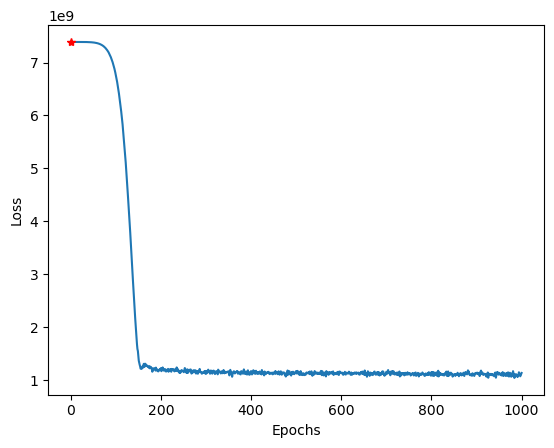

In [ ]:
plt.plot(range(epoch+1), loss_curve)
plt.plot(range(epochs+1)[::3000], loss_curve[::3000], '*r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
model = SalaryPredict(input_size)
loader = torch.load('dump_data/model.pt')
model.load_state_dict(loader['Model'])
encoder_country = loader['country_encoder']
encoder_ed = loader['ed_encoder']
encoder_employment = loader['employment_encoder']
encoder_job = loader['job_encoder']
encoder_gender = loader['gender_encoder']

In [ ]:
print(encoder_country.classes_)
print(encoder_ed.classes_)
print(encoder_employment.classes_)
print(encoder_job.classes_)
print(encoder_gender.classes_)

['Australia' 'Brazil' 'Canada' 'France' 'Germany' 'India' 'Italy'
 'Netherlands' 'Other' 'Poland' 'Spain'
 'United Kingdom of Great Britain and Northern Ireland'
 'United States of America']
['Associate' 'Bachelor' 'Doctoral' 'Master' 'Other degree'
 'Primary school' 'Professional' 'Secondary school']
['freelancer' 'full-time' 'part-time']
['Junior Business Analyst' 'Junior Business Development Associate'
 'Junior Financial Analyst' 'Junior Marketing Coordinator'
 'Junior Marketing Manager' 'Junior Marketing Specialist'
 'Junior Operations Analyst' 'Junior Sales Representative' 'Other'
 'Senior Business Analyst' 'Senior Financial Analyst'
 'Senior Operations Manager' 'Senior Product Manager']
['Female' 'Male']


# Testing

In [ ]:
x = np.array([['Australia', 'Associate', 'freelancer', 'Junior Business Analyst', 'Female', 21]])
x

array([['Australia', 'Associate', 'freelancer',
        'Junior Business Analyst', 'Female', '21']], dtype='<U23')

In [ ]:
x[:, 0] = encoder_country.transform(x[:, 0])
x[:, 1] = encoder_ed.transform(x[:, 1])
x[:, 2] = encoder_employment.transform(x[:, 2])
x[:, 3] = encoder_job.transform(x[:, 3])
x[:, 4] = encoder_gender.transform(x[:, 4])
x = x.astype(float)
x

array([[ 0.,  0.,  0.,  0.,  0., 21.]])

## Load pickle

In [ ]:
with open('dump_data/model.pkl', 'rb') as file:
    data = pickle.load(file)

lr_regressor = data['LinearRegression']
dt_regressor = data['DecissionTree']
# rf_regressor = data['RandomForest']

In [ ]:
y_pred_lr = lr_regressor.predict(x)[0]
y_pred_dt = dt_regressor.predict(x)[0]
# y_pred_rf = rf_regressor.predict(x)[0]
y_pred_nn = model(torch.from_numpy(x.astype(float)).float()).item()

In [ ]:
print(f'Linear Regression: {y_pred_lr}')
print(f'Decission Tree: {y_pred_dt}')
# print(f'Random Forest: {y_pred_rf}')
print(f'Neural Network: {y_pred_nn}')

Linear Regression: 122873.74922779438
Decission Tree: 187406.5
Neural Network: 102418.625
